In [2]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
import matplotlib.ticker as plticker
from scipy.signal import find_peaks
from scipy.optimize import fsolve
from numpy.lib.scimath import sqrt as csqrt


plt.rcParams["figure.figsize"] = (15,7)

os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/BRAG-GRATINGS/simulations/python')) #Current directory

from jupyterthemes import jtplot

jtplot.style(theme='onedork', context='notebook', ticks=True, grid=True)
plt.rcParams["figure.figsize"] = (15,7)

def fwhm(x,y):
    from scipy.signal import find_peaks
    peak, pd = find_peaks(y)
    rmax = y[peak[np.argmax(y[peak])]]
    for i in range(peak[np.argmax(y[peak])],0,-1):

        if y[i] < rmax/2 and y[i+1] > rmax/2:
            halfminindex = i
            break

    for i in range(peak[np.argmax(y[peak])],np.size(x)):
        if y[i] > rmax/2 and y[i+1] < rmax/2:
            halfmaxindex = i
            break
        
    plt.plot(x[halfminindex]*1e9,y[halfminindex],'o',color='r')
    plt.plot(x[halfmaxindex]*1e9,y[halfmaxindex],'o',color='r')
    plt.text(x[int((halfminindex+halfmaxindex)/2)]*1e9,0.97*rmax/2,'FWHM = {}nm'.format(round((x[halfmaxindex]-x[halfminindex])*1e9,3)),color='r',weight='black',fontsize =20,horizontalalignment='center',
        verticalalignment='top')
    plt.plot([x[halfminindex]*1e9,x[halfmaxindex]*1e9],[rmax/2,rmax/2],linestyle='--')
    print('Comprimentos 3 dB: {0} nm e {1} nm'.format(round(x[halfminindex]*1e9,3),round(x[halfmaxindex]*1e9,3)))
    return halfminindex,halfmaxindex


def fwhmlog(x,y):
    from scipy.signal import find_peaks
    peak, pd = find_peaks(y)
    rmax = y[peak[np.argmax(y[peak])]]

    for i in range(peak[np.argmax(y[peak])],0,-1):

        if y[i] < rmax - 3 and y[i+1] > rmax - 3:
            halfminindex = i
            break

    for i in range(peak[np.argmax(y[peak])],np.size(x)):

        if y[i] > rmax - 3 and y[i+1] < rmax - 3:
            halfmaxindex = i
            break
    plt.plot(x[halfminindex]*1e9,y[halfminindex],'o',color='r')
    plt.plot(x[halfmaxindex]*1e9,y[halfmaxindex],'o',color='r')
    plt.text(x[int((halfminindex+halfmaxindex)/2)]*1e9,1.1*(rmax - 3),'FWHM = {}nm'.format(round((abs((x[halfmaxindex]-x[halfminindex])[0]))*1e9,3)),color='r',weight='black',fontsize =20,horizontalalignment='center',
        verticalalignment='top')
    plt.plot([x[halfminindex]*1e9,x[halfmaxindex]*1e9],[rmax - 3,rmax - 3],linestyle='--',color='r')

    plt.axvline(x=(x[halfminindex]+(x[halfmaxindex]-x[halfminindex])/2)[0]*1e9,ymax=0.97,color='r',linestyle='--')
    plt.text((x[halfminindex]+(x[halfmaxindex]-x[halfminindex])/2)[0]*1e9,rmax-6,r'$\lambda_b$ = {}nm'.format(round((x[halfminindex]+(x[halfmaxindex]-x[halfminindex])/2)[0]*1e9,3)),color='r',weight='black',fontsize =20,horizontalalignment='center',verticalalignment='top')

    print('COmrpiemento de bragg = {}nm'.format(round((x[halfminindex]+(x[halfmaxindex]-x[halfminindex])/2)[0]*1e9,3)))
    print('Comprimentos 3 dB: {0} nm e {1} nm'.format(round(x[halfminindex][0]*1e9,3),round(x[halfmaxindex][0]*1e9,3)))
    return halfminindex,halfmaxindex


In [2]:
k = [30,40,50,60,70,80,90,100,150,200,250,295]
neff1500 = [3.45309,3.45319,3.45340,3.45373,3.45417,3.45471,3.45535,3.45609,3.46100,3.46760,3.47540,3.48314]
neff2000 = [3.42478,3.42488,3.42508,3.42540,3.42582,3.42633,3.42695,3.42765,3.43234,3.43863,3.44609,3.45352]
neff1550 = np.subtract(neff1500,neff2000)
deltaneff = np.subtract(neff1550,0.1)

## Calculos Teoricos

Ac index change = 0.0005200241845036393
Aproximação analitica: FWHM = 0.467 nm
4
Comprimentos 3 dB: 1499.631 nm e 1500.369 nm

Parametros da grade:
Perido da grade = 5.183137525915688e-07nm
numero de periodos = 3858.666666666667
Δn = 0.0008168520788628281


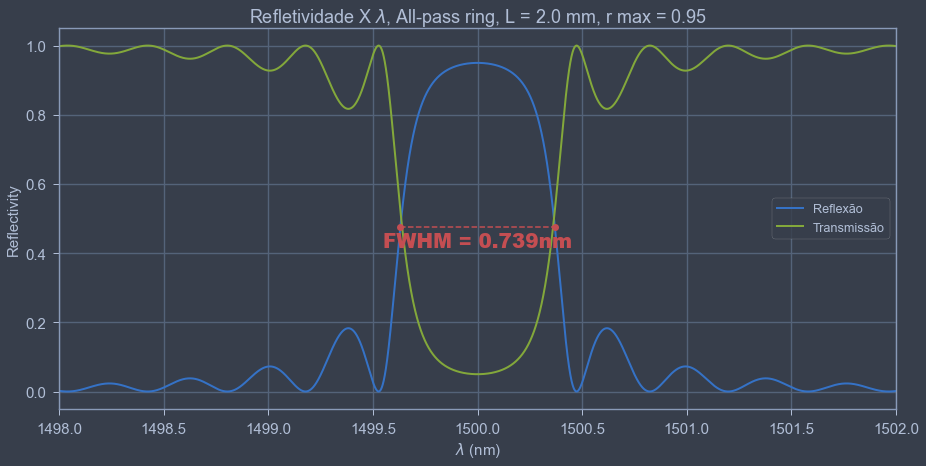

In [12]:
# Constantes

c = 299792458
neff = 1.447
ng = 2.9337
comprimento = np.linspace(1498*1e-9,1502*1e-9,100000)

# Parametros

lambda_ressonancia = 1500e-9
L = 2e-3
rmax = 0.95
periodo = lambda_ressonancia/(2*neff)
n = L/periodo

# Calculos
sigma_base = 0 # dc coupling
detuning = 2*np.pi*neff*(1/comprimento - 1/lambda_ressonancia)

sigma = sigma_base + detuning
kappa = np.arctanh(np.sqrt(rmax))/L

vneff  = kappa*lambda_ressonancia/np.pi
#kappa = np.pi*vindice/comprimento
reflexao = abs((np.sinh(L*csqrt((kappa**2-sigma**2)))**2)/((np.cosh(L*csqrt((kappa**2-sigma**2)))**2) - ((sigma**2)/(kappa**2))))
print('Ac index change = {}'.format(kappa*lambda_ressonancia/np.pi))


# Zeros da função
bandamin = lambda_ressonancia - vneff/(2*neff)*lambda_ressonancia
bandamax = lambda_ressonancia + vneff/(2*neff)*lambda_ressonancia
largura = vneff/neff*lambda_ressonancia

# Banda de passagem
bandateo = (lambda_ressonancia**2)*np.sqrt(kappa**2+(np.pi/L)**2)/(ng*np.pi)
#print((lambda_ressonancia**2)*np.sqrt(kappa**2+(np.pi/L)**2)/(1.563e-9*np.pi))

#print('Aproximação analitica: Comprimento de corte inferior = {} nm'.format(bandamin*1e9))
#print('Aproximação analitica: Comprimento de corte superior = {} nm'.format(bandamax*1e9))
print('Aproximação analitica: FWHM = {} nm'.format(round((bandateo)*1e9,3)))



plt.plot(comprimento*1e9,reflexao,linewidth=2)
plt.plot(comprimento*1e9,1-reflexao,linewidth=2)
plt.xlim(comprimento[0]*1e9,comprimento[np.size(comprimento)-1]*1e9)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Reflectivity',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Refletividade X $\lambda$'', All-pass ring, L = {} mm, r max = {}'.format(L*1e3,rmax),fontsize =18)
plt.legend(['Reflexão','Transmissão'])

#fwhm

halfminindex, halfmaxindex = fwhm(comprimento,reflexao)

print('\n' 'Parametros da grade:')
print('Perido da grade = {}nm'.format(periodo))
print('numero de periodos = {}'.format(n))
print('Δn = {}'.format(kappa*lambda_ressonancia/2))

Comprimentos 3 dB: 1499.22 nm e 1500.781 nm


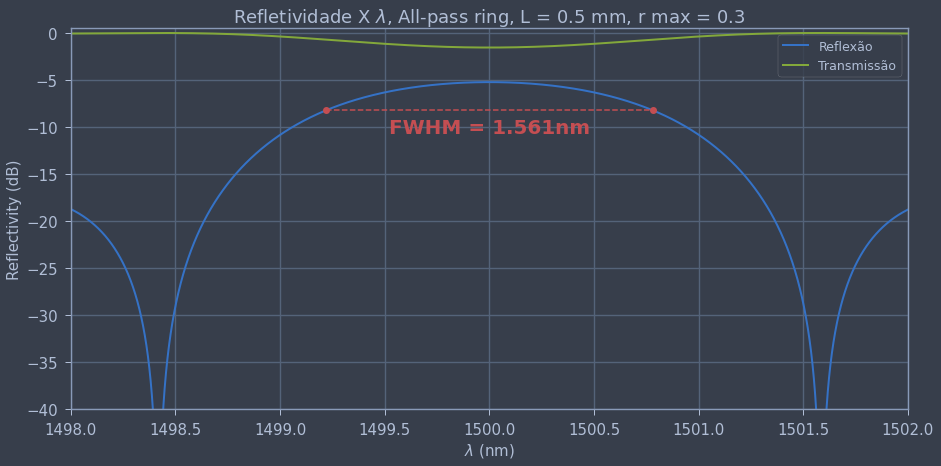

In [10]:
plt.plot(comprimento*1e9,10*np.log10(reflexao),linewidth=2)
plt.plot(comprimento*1e9,10*np.log10(1-reflexao),linewidth=2)
plt.xlim(comprimento[0]*1e9,comprimento[np.size(comprimento)-1]*1e9)
plt.ylim(-40,0.5)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Reflectivity (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Refletividade X $\lambda$'', All-pass ring, L = {} mm, r max = {}'.format(L*1e3,rmax),fontsize =18)
plt.legend(['Reflexão','Transmissão'])

halfminindex, halfmaxindex = fwhmlog(comprimento,10*np.log10(reflexao))

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


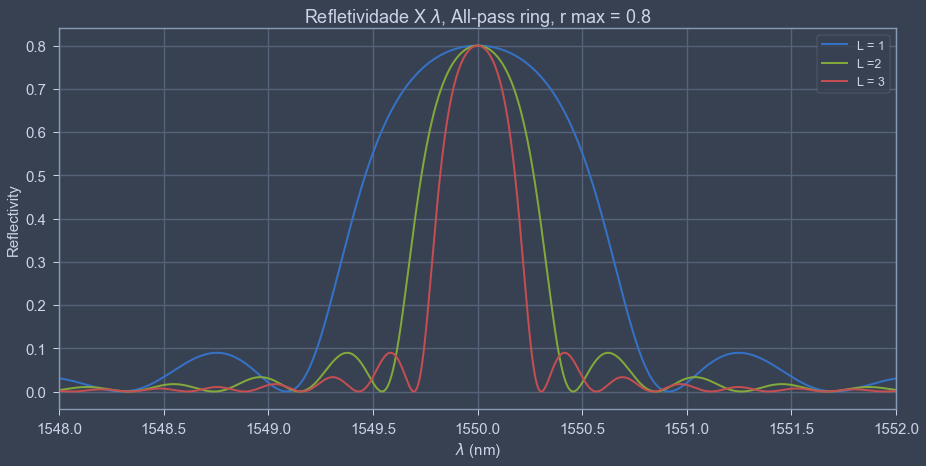

In [28]:
# Constantes

c = 299792458
neff = 1.447
comprimento = np.linspace(1548*1e-9,1552*1e-9,100000)
# Parametros

lambda_ressonancia = 1550e-9
L = 1e-3
rmax = 0.8

# Calculos
sigma_base = 0 # dc coupling
detuning = 2*np.pi*neff*(1/comprimento - 1/lambda_ressonancia)

sigma = sigma_base + detuning
kappa = np.arctanh(np.sqrt(rmax))/L

#vindice = kappa*lambda_ressonancia/np.pi
#kappa = np.pi*vindice/comprimento
reflexao1 = (np.sinh(L*csqrt((kappa**2-sigma**2)))**2)/((np.cosh(L*csqrt((kappa**2-sigma**2)))**2) - ((sigma**2)/(kappa**2)))

lambda_ressonancia = 1550e-9
L = 2e-3
rmax = 0.8

# Calculos
sigma_base = 0 # dc coupling
detuning = 2*np.pi*neff*(1/comprimento - 1/lambda_ressonancia)

sigma = sigma_base + detuning
kappa = np.arctanh(np.sqrt(rmax))/L

#vindice = kappa*lambda_ressonancia/np.pi
#kappa = np.pi*vindice/comprimento
reflexao2 = (np.sinh(L*csqrt((kappa**2-sigma**2)))**2)/((np.cosh(L*csqrt((kappa**2-sigma**2)))**2) - ((sigma**2)/(kappa**2)))

lambda_ressonancia = 1550e-9
L = 3e-3
rmax = 0.8

# Calculos
sigma_base = 0 # dc coupling
detuning = 2*np.pi*neff*(1/comprimento - 1/lambda_ressonancia)

sigma = sigma_base + detuning
kappa = np.arctanh(np.sqrt(rmax))/L

#vindice = kappa*lambda_ressonancia/np.pi
#kappa = np.pi*vindice/comprimento
reflexao3 = (np.sinh(L*csqrt((kappa**2-sigma**2)))**2)/((np.cosh(L*csqrt((kappa**2-sigma**2)))**2) - ((sigma**2)/(kappa**2)))

plt.plot(comprimento*1e9,reflexao1,linewidth=2)
plt.plot(comprimento*1e9,reflexao2,linewidth=2)
plt.plot(comprimento*1e9,reflexao3,linewidth=2)


#plt.plot(comprimento*1e9,10*np.log10(reflexao1),linewidth=2)
#plt.plot(comprimento*1e9,10*np.log10(reflexao2),linewidth=2)
#plt.plot(comprimento*1e9,10*np.log10(reflexao3),linewidth=2)
#plt.ylim(-40,0)
plt.xlim(1548,1552)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Reflectivity',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Refletividade X $\lambda$'', All-pass ring, r max = 0.8'.format(L*1e3),fontsize =18)
plt.legend(['L = 1', 'L =2', 'L = 3'])


## Interconnect

In [4]:
inter = lumapi.INTERCONNECT(filename='TheoricSimulations.icp')

dict_keys(['wavelength', 'frequency', 'TE gain (dB)', 'Lumerical_dataset'])


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


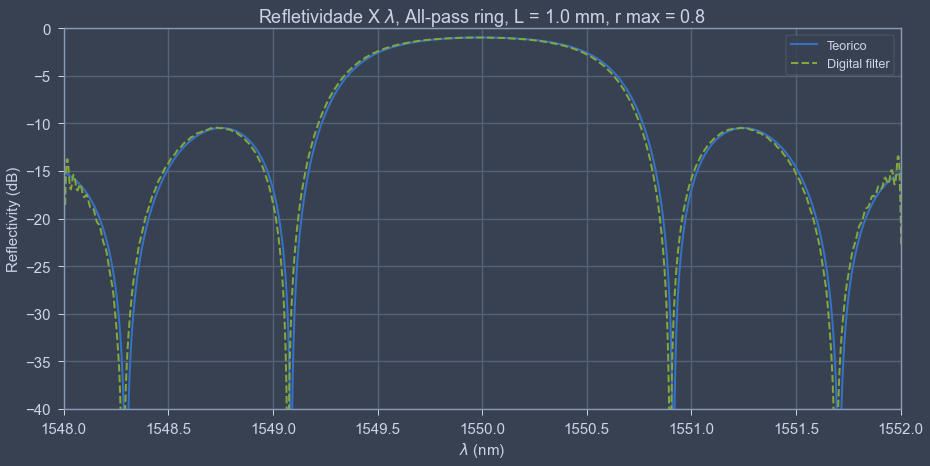

In [18]:
reflexaointer = inter.getresult('ONA_3','input 1/mode 1/gain')
transmissaointer = inter.getresult('ONA_1','input 2/mode 1/gain')
print(reflexaointer.keys())
plt.plot(comprimento*1e9,10*np.log10(reflexao),linewidth=2)
plt.plot(reflexaointer['wavelength']*1e9,reflexaointer['TE gain (dB)'],linewidth=2,linestyle='--')

#plt.plot(transmissaointer['wavelength']*1e9,transmissaointer['TE gain (dB)'])

plt.xlim(1548,1552)
plt.ylim(-40,0)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Reflectivity (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Refletividade X $\lambda$'', All-pass ring, L = {} mm, r max = {}'.format(L*1e3,rmax),fontsize =18)
plt.legend(['Teorico','Digital filter'])

In [31]:
x = np.linspace(0,np.pi,1000)
y = np.sin(x)

peak, peakd = find_peaks(y,rel_height=0.1)
#peakvalue = y[peak]
print(peak)

[499]


# Simulação MODE

In [72]:
Neff = 2.537329
Ng = 4.198189
comprimentocentral = 1540e-9
Fwhm =  20e-9
#20e-9
N = 120
periodo = comprimentocentral/(2*Neff)
print('Periodo = {} nm'.format(periodo*1e9))
print('Numero de periodos = {}'.format(N))
L = periodo*N

kappa = np.sqrt((Fwhm*np.pi*Ng/comprimentocentral**2)**2 - (np.pi/L)**2)
print('kappa = {}'.format(kappa))

deltaNeff = kappa*comprimentocentral/2
print('deltaNeff = {}'.format(deltaNeff))

rmax = np.tanh(kappa*L)
print('rmax = {}'.format(rmax))


Periodo = 303.4687263654024 nm
Numero de periodos = 120
kappa = 70203.62498011661
deltaNeff = 0.054056791234689795
rmax = 0.98803724582482


In [78]:
def f(k):
    Neff = 2.537329
    Ng = 4.198189
    comprimentocentral = 1540e-9
    Fwhm =  20e-9
    N = 300
    periodo = comprimentocentral/(2*Neff)
    L = periodo*N
    return Fwhm - (comprimentocentral**2)/(np.pi*Ng)*csqrt(k**2+(np.pi/L)**2)

x = fsolve(f,70000)
print(x)
print(f(x))

[105736.05148279]
[0.]


In [25]:
mode = lumapi.MODE(filename='bragg.lms')

Exception ignored in: <function Lumerical.__del__ at 0x000001874BB0F8B0>
Traceback (most recent call last):
  File "C:\Program Files\Lumerical\v202\api\python\lumapi.py", line 1179, in __del__
    close(self.handle)
  File "C:\Program Files\Lumerical\v202\api\python\lumapi.py", line 252, in close
    iapi.appClose(handle)
ctypes.ArgumentError: argument 1: <class 'TypeError'>: expected Session instance instead of Session


In [13]:
N = 20
deltaw = np.linspace(0,0.08,N)
neff1 = np.zeros(N)
neff2 = np.zeros(N)
mode.switchtolayout()
mode.setnamed('FDE','x',0.1e-6)

for x in range(N):
    mode.setnamed('bragg','deltaW',deltaw[x]*1e-6)
    mode.findmodes()
    neff1[x] = np.real(mode.getdata('FDE::data::mode1','neff'))
    mode.switchtolayout()

mode.setnamed('FDE','x',0.2e-6)
for x in range(N):
    mode.setnamed('bragg','deltaW',deltaw[x]*1e-6)
    mode.findmodes()
    neff2[x] = np.real(mode.getdata('FDE::data::mode1','neff'))
    mode.switchtolayout()




Text(52, 0.03, '$\\Delta$W = 51.7 nm')

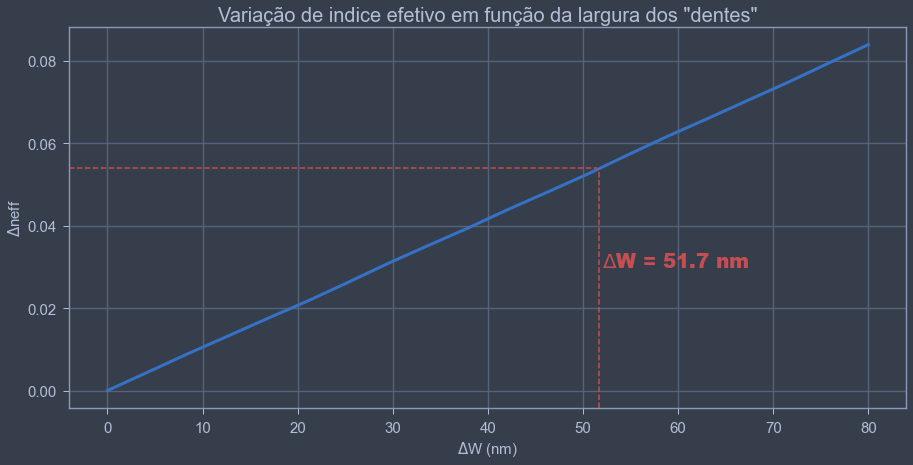

In [36]:
plt.plot(deltaw*1e3,neff1-neff2,linewidth=3)
plt.xlabel(r'$\Delta$W (nm)',fontsize =15)
plt.ylabel(r'$\Delta$neff',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Variação de indice efetivo em função da largura dos "dentes"',fontsize =20)
#plt.legend(['Pass','drop'])
plt.axhline(y=0.054056,xmax=0.63,linestyle='--',color = 'r')
plt.axvline(x=51.7,ymax=0.63,linestyle='--',color = 'r')
plt.text(52,0.03,'$\Delta$W = 51.7 nm',color='r',weight='black',fontsize =20)
#plt.xlim(50,55)

In [22]:
mode.setemeanalysis("wavelength sweep",1)
mode.setemeanalysis("start wavelength",1.52e-6)
mode.setemeanalysis("stop wavelength",1.56e-6)
mode.setemeanalysis("number of wavelength points",15000)
mode.emesweep("wavelength sweep")


dict_keys(['wavelength', 's11', 's21', 's12', 's22', 'Lumerical_dataset'])
COmrpiemento de bragg = 1539.937nm
Comprimentos 3 dB: 1531.134 nm e 1548.741 nm


Text(0.5, 1.0, 'Variação de temperatura')

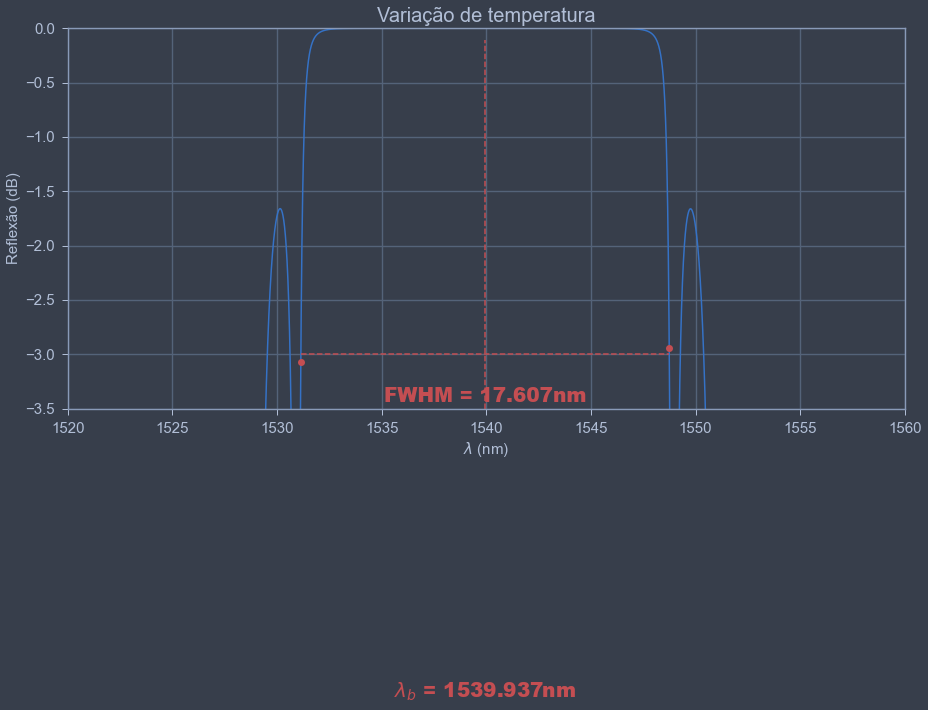

In [23]:
S= mode.getemesweep("S_wavelength_sweep")
print(S.keys())
plt.plot(S['wavelength']*1e9,10*np.log10(abs(S['s11'])**2))
plt.xlim(S['wavelength'][0]*1e9,S['wavelength'][-1]*1e9)
plt.ylim(-30,1)
halfminindex, halfmaxindex = fwhmlog(S['wavelength'],10*np.log10(abs(S['s11'])**2))


#plt.xlim(1500,1580)
plt.ylim(-3.5,0)

plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflexão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Variação de temperatura',fontsize =20)

# C1 = 1521.003
# C2 = 1557.82
# plt.plot([C1,C2],[-3,-3],'o',color='r')
# plt.plot([C1,C2],[-3,-3],'o',linestyle='--',color='r')
# plt.text(C1 + (C2-C1)/2,1.1*(rmax - 3),'FWHM = {}nm'.format(round(C2-C1,3)),color='r',weight='black',fontsize =20,horizontalalignment='center',
#         verticalalignment='top')
# plt.axvline(x=(C1+(C2-C1)/2),ymax=0.97,color='r',linestyle='--')
# plt.text((C1+(C2-C1)/2),rmax-6,r'$\lambda_b$ = {}nm'.format(round((C1+(C2-C1)/2),3)),color='r',weight='black',fontsize =20,horizontalalignment='center',verticalalignment='top')

(10.0, 100.0)

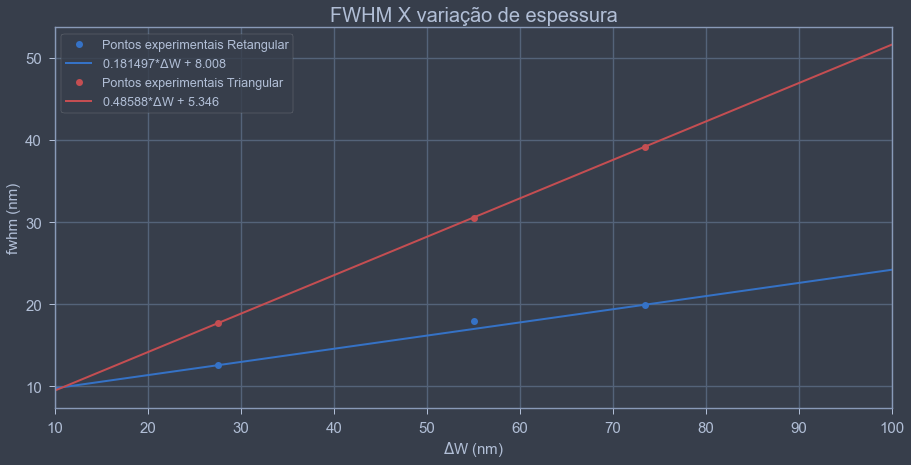

In [236]:

x1 = np.linspace(10,100,1000)
y1 = 0.160269*x1 + 8.1752


w1= [0.02752755*1e3,0.0550551*1e3,0.0734068*1e3] 
p1 = [12.587,17.956,19.94]
a = 226


x2 = np.linspace(10,100,1000)
y2 = 0.467728*x2 + 4.8286

w2 = [0.02752755*1e3,0.0550551*1e3,0.0734068*1e3] 
p2 = [17.704,30.548,39.163] 



x3 = np.linspace(10,100,1000)
y3 = 0.590616*x3 + 4.5138

w3 = [0.02752755*1e3,0.0550551*1e3,0.0734068*1e3] 
p3 = [20.772,36.817,47.869] 

plt.plot(w1,p1,'o',label='Pontos experimentais Retangular',color='b')
plt.plot(x1,y1,label=r'0.181497*$\Delta$W + 8.008',color='b',linewidth=2)

plt.plot(w2,p2,'o',label=r'Pontos experimentais Triangular',color='r')
plt.plot(x2,y2,color='r',linewidth=2,label=r'0.48588*$\Delta$W + 5.346')

#plt.plot(w3,p3,'o',label=r'Pontos experimentais senoidais',color='g')
#plt.plot(x3,y3,color='g',linewidth=2,label=r'0.590616*$\Delta$W + 4.5138')

plt.legend()
plt.xlabel(r'$\Delta$W (nm)',fontsize =15)
plt.ylabel('fwhm (nm)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'FWHM X variação de espessura',fontsize =20)
plt.xlim(10,100)

Text(0.5, 1.0, 'Comprimento de Bragg X Temperatura')

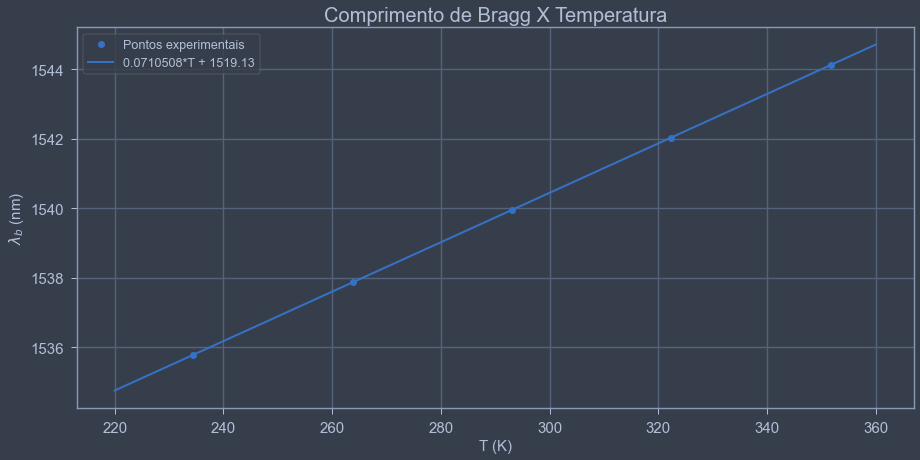

In [33]:
T = [293.1*0.8,293.1*0.9,293.1,293.1*1.1,293.1*1.2]
fwhm = [19.998,19.972,19.94,19.916,19.892]
comprimento = [1535.787,1537.868,1539.948,1542.032,1544.117]

x = np.linspace(220,360,1000)
fweq = 20.21 - 0.000904128*x
comeq = 0.0710508*x + 1519.13

plt.plot(T,comprimento,'o',label='Pontos experimentais',color='b')
plt.plot(x,comeq,linewidth=2,label=r'0.0710508*T + 1519.13')

plt.legend()
plt.xlabel(r'T (K)',fontsize =15)
plt.ylabel(r'$\lambda_b$ (nm)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Comprimento de Bragg X Temperatura',fontsize =20)
#plt.xlim(10,100)

In [3]:
fdtd = lumapi.FDTD(filename='bragg_FDTD_GDS_100.fsp')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])
COmrpiemento de bragg = 1533.015nm
Comprimentos 3 dB: 1543.063 nm e 1522.966 nm


(1490.0, 1590.0)

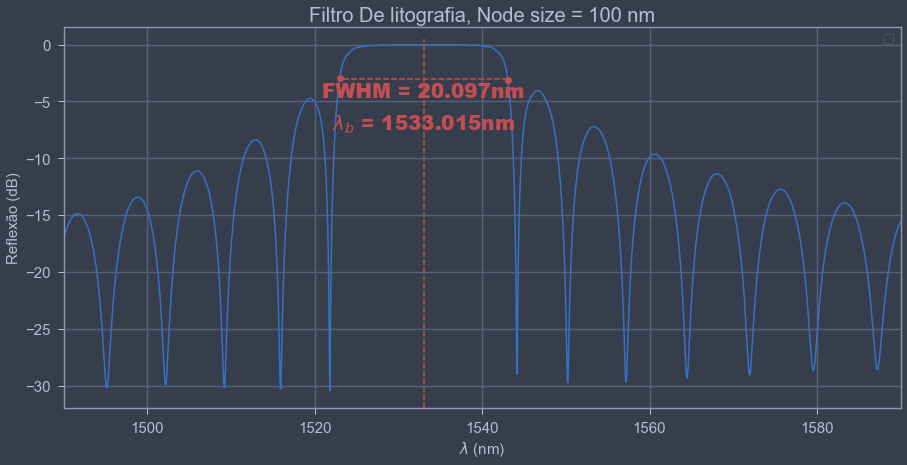

In [8]:
P2 = fdtd.getresult('FDTD::ports::port 1','T')
print(P2.keys())

plt.plot(P2['lambda']*1e9,10*np.log10(abs(1-P2['T'])))
halfminindex, halfmaxindex = fwhmlog(P2['lambda'],10*np.log10(abs(1-P2['T'])))
plt.legend()
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflexão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title(r'Filtro De litografia, Node size = 100 nm',fontsize =20)
plt.xlim(1490,1590)